<a href="https://colab.research.google.com/github/smvazirizade/examples/blob/main/example-ml/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://cdn.vanderbilt.edu/vu-www4/brandbar/svg/Optimized/vanderbilt.svg)



# Unsupervised Clustering Algorithms

### About this Lesson
In this lesson, we will learn about and implement two unsupervised clustering algorithms, K-mean and DBSCAN, using scikit-learn.

In [ ]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

print(time.ctime())

Wed Apr 14 23:10:42 2021


## Importing Data

For this lesson, we will use some data generated from scikit-learn that is formulated to show the power of these unsupervised algorithms.

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X_blob_data, y_blob_data = make_blobs(n_samples=2000, centers=centers, cluster_std=0.4, random_state=1)

The *make_blobs* function generates clusters of data centered at the points of our choosing. The X array contains the (x,y) coordinates of the data points and the y array contains the index or label of the cluster to which each point belongs. We can plot the points to see the clear three clusters of data.

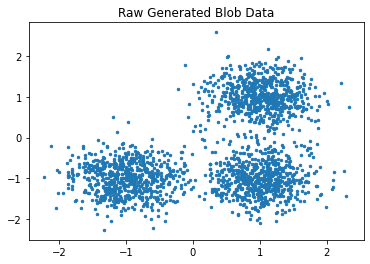

In [ ]:
plt.scatter(X_blob_data[:,0], X_blob_data[:,1], s=6)
plt.title("Raw Generated Blob Data")
plt.show()

In [ ]:
X_moon_data, y_moon_data = make_moons(n_samples=1500, noise=0.05, random_state=1)
X_moon_data = StandardScaler().fit_transform(X_moon_data) # Standard Scale the data for easier parameter selection

The *make_moons* function generates two clusters of data which instead of being globular are shaped like moons. Again, the X array contains the (x,y) coordinates of the data points and the y array contains the index or label of the cluster to which each point belongs. We can plot these points to see two moon shaped clusters.

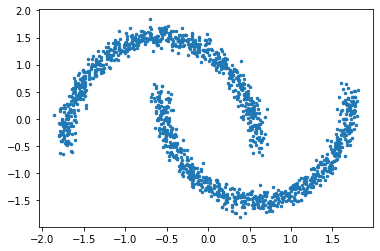

In [ ]:
plt.scatter(X_moon_data[:,0], X_moon_data[:,1], s=6)
plt.show()

Notice that we are working with unsupervised algorithms, so it is not strictly necessary to perform a training and testing split of the data as we have done for previous assignments and algorithms. So, we are ready to move on to creating the model.

## K-Means Clustering

The K means algorithm works by creating *k* points which are the centroids of clusters. Then the data points are assigned to one of the clusters based on the distance to the centroids. After that, the centroids are recomputed based on the assignments and the process repeats until the clusters remain the same between iterations. We will use the K-Means implementation available in scikit-learn.

In [ ]:
from sklearn.cluster import KMeans

### Blob Data

First, we will run the K-means algorithm on the generated blob data, fixing the number of cluster to 3.

In [ ]:
k_means = KMeans(n_clusters=3, random_state=4)
k_means.fit(X_blob_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=4, tol=0.0001, verbose=0)

After the algorithm is trained on the data, we can view the parameters that the model computed.

In [ ]:
k_means_labels = k_means.labels_
print("Labels: ", k_means_labels)
print()

k_means_centroids = k_means.cluster_centers_
print("Centroids: \n", k_means_centroids)

Labels:  [1 2 1 ... 2 0 2]

Centroids: 
 [[-0.99335315 -0.99696088]
 [ 1.01367054  1.0149972 ]
 [ 1.00630423 -1.01332555]]


We can also plot the results of the clustering. We will use different colors to represent the different cluster assignments.

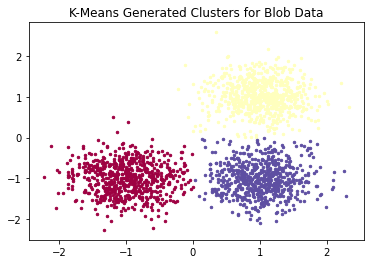

In [ ]:
unique_labels = set(k_means_labels)
core_samples_mask = np.zeros_like(k_means_labels, dtype=bool)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    class_member_mask = (k_means_labels == k)

    xy = X_blob_data[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:,0], xy[:,1], s=6, color=col)

plt.title("K-Means Generated Clusters for Blob Data")
plt.show()

So we can see visually that K-Means did an excellent job separating these clusters. However, we can also analyze the result quantitatively here, since we know which points belong to which cluster based on the data generation. For this task, we can use a variety of the same measures that are used for supervised classification, such as accuracy score.

Accuracy measures the percentage of test data that was correctly labeled. The closer the accuracy is to 1, the better the results. In this sense, it is very easy to interpret. For accuracy to be a good measure of performance, the number of points which contain each label must be approximately equal. However, in this dataset, this is the case and there are approximately equal numbers of each class. So, we will use accuracy for measurement.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Accuracy Score: %.3f" % accuracy_score(y_blob_data, k_means_labels))

Accuracy Score: 0.328


So we can see that not only did K-means do an excellent job on this dataset visually, but also has an accuracy of over 99%.

### Moon Data

Now that we have seen that K-means works on the blob data, let us try to run the algorithm on the moon data to see how well it performs.

In [ ]:
k_means_moon = KMeans(n_clusters=2)
k_means_moon.fit(X_moon_data)

k_means_labels = k_means_moon.labels_
k_means_centroids = k_means_moon.cluster_centers_

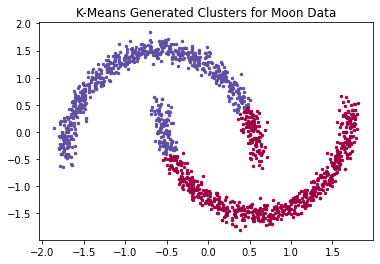

In [ ]:
unique_labels = set(k_means_labels)
core_samples_mask = np.zeros_like(k_means_labels, dtype=bool)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    class_member_mask = (k_means_labels == k)

    xy = X_moon_data[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:,0], xy[:,1], s=6, color=col)

plt.title("K-Means Generated Clusters for Moon Data")
plt.show()

So we can see that a somewhat unexpected result occurs. K-means was not able to generate clusters for the moons and instead generated two clusters that both overlapped the actual clusters. This happens because the ordinary version of K-means generates globular-shaped clusters only. So, for clusters which do not follow this pattern, K-means is not a good choice.

## DBSCAN Clustering

So in order to cluster non-globular clusters, we have to employ a different algorithm than the standard K-means. Luckily, there are many other clustering algorithms available. One such algorithm is DBSCAN. DBSCAN is a density-based clustering algorithm, meaning that instead of clustering points based on distance to some centroid, as K-means does, DBSCAN forms clusters based on where data points are most dense. 

We will once again use the DBSCAN implementation found in Scikit-learn. You will notice that for this density-based algorithm, the number of clusters does not need to be supplied ahead of time. However, there is another parameter that must be supplied, *eps*, which represents a sort of distance threshold for two points to be considered dense. This parameter is unique to each dataset and typically requires some amount of experimentation to see what produces a good result, but for this dataset, we will use 0.3.

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.3)
dbscan.fit(X_moon_data)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [ ]:
dbscan_labels = dbscan.labels_

Once again, we can plot the data to see what clusters it generated.

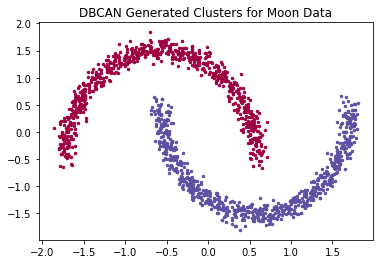

In [ ]:
unique_labels = set(dbscan_labels)
core_samples_mask = np.zeros_like(dbscan_labels, dtype=bool)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    class_member_mask = (dbscan_labels == k)

    xy = X_moon_data[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:,0], xy[:,1], s=6, color=col)

plt.title("DBCAN Generated Clusters for Moon Data")
plt.show()

It is very evident that DBSCAN did a better job clustering on this non-globular dataset than K-means did, which is a good demonstration of why choosing the right clustering algorithm for your task can have a big impact on the performance.